# Cell 1 - Markdown (füge als Text-Zelle ein)
# 01 – Data Preparation

In this notebook, we load and explore the German Credit Risk dataset, perform basic cleaning, create a proxy target variable (default) for risk modeling, and analyze key categorical and numerical features.

This step serves as the foundation for subsequent modeling, security testing, and governance analysis of AI systems.

In [1]:
# Cell 2 - Code: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("..")
from src.data_loader import load_and_preprocess_data

sns.set(style="whitegrid")

In [2]:
import os

# Zeigt, wo du dich gerade befindest:
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

# Damit du den exakten Speicherort prüfen kannst:
print("Existiert credit.csv?", os.path.exists("data/credit.csv"))

Aktuelles Arbeitsverzeichnis: c:\Users\eren_\OneDrive\Desktop\secureML-audit-framework
Existiert credit.csv? True


In [3]:
# Cell 3 - Code: Load dataset and preview
import os
import pandas as pd

# Projektverzeichnis setzen
os.chdir(r"C:/Users/eren_/OneDrive/Desktop/secureML-audit-framework")
print("Neues Arbeitsverzeichnis:", os.getcwd())
print("Existiert credit.csv?", os.path.exists("data/credit.csv"))

# Daten laden
df = pd.read_csv("data/credit.csv")

# Spaltennamen vereinheitlichen: Leerzeichen und Klein-/Großschreibung anpassen
df.columns = df.columns.str.strip().str.replace(" ", "").str.replace("-", "").str.capitalize()
df.head()

Neues Arbeitsverzeichnis: C:\Users\eren_\OneDrive\Desktop\secureML-audit-framework
Existiert credit.csv? True


,Unnamed:0,Age,Sex,Job,Housing,Savingaccounts,Checkingaccount,Creditamount,Duration,Purpose,Default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1


In [4]:
# Cell 4 - Code: Basic info and missing values
print("Columns:", df.columns.tolist())
print("\nMissing values:\n", df.isna().sum())

Columns: ['Unnamed:0', 'Age', 'Sex', 'Job', 'Housing', 'Savingaccounts', 'Checkingaccount', 'Creditamount', 'Duration', 'Purpose', 'Default']

Missing values:
 Unnamed:0            0
Age                  0
Sex                  0
Job                  0
Housing              0
Savingaccounts     183
Checkingaccount    394
Creditamount         0
Duration             0
Purpose              0
Default              0
dtype: int64


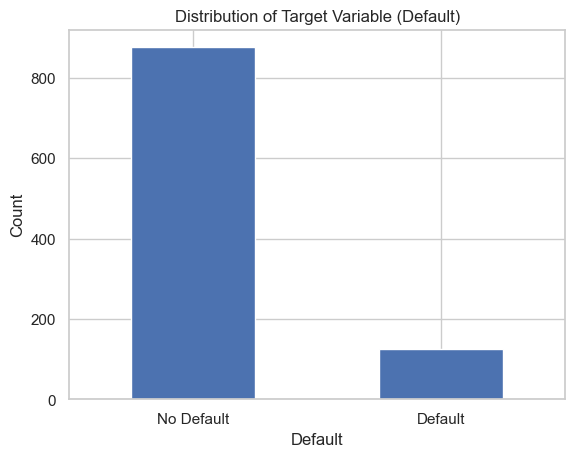

In [5]:
# Cell 5 - Code: Create proxy target variable 'default'
import matplotlib.pyplot as plt

# Zielvariable überschreiben – ACHTUNG: angepasste Spaltennamen nutzen!
df["Default"] = ((df["Creditamount"] > 5000) & (df["Duration"] > 24)).astype(int)

# Plot der Zielvariable
df["Default"].value_counts().plot(kind="bar", title="Distribution of Target Variable (Default)")
plt.xticks([0, 1], ["No Default", "Default"], rotation=0)
plt.ylabel("Count")
plt.show()

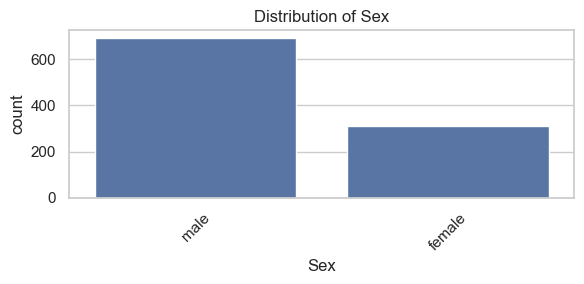

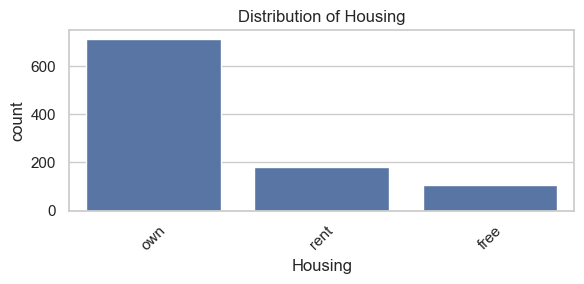

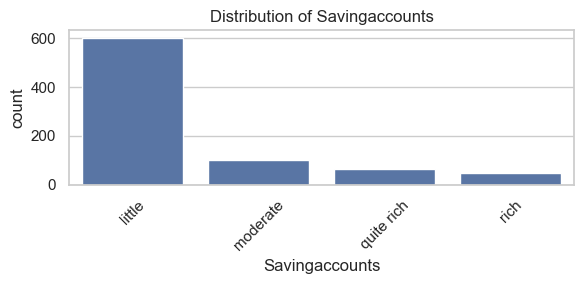

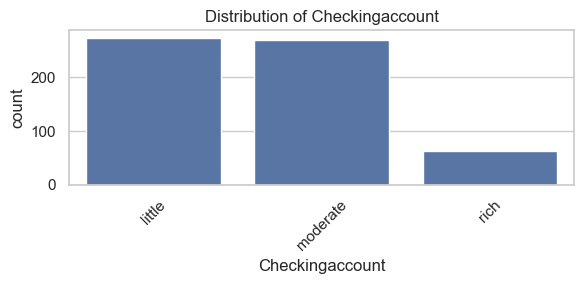

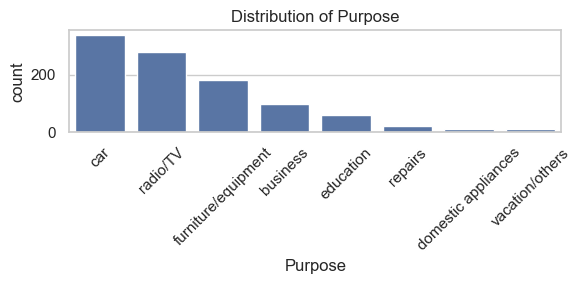

In [6]:
# Cell 6 - Explore cleaned categorical columns
categorical_cols = ["Sex", "Housing", "Savingaccounts", "Checkingaccount", "Purpose"]

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Cell 7 - Markdown
## Final preprocessing

We now use the centralized load_and_preprocess_data() function from the src/ module to encode, scale and split the dataset into training and test sets. This ensures reusability across all subsequent notebooks.

In [7]:
# Cell 8 - Code: Final preprocessing and split
X_train, X_test, y_train, y_test = load_and_preprocess_data()

print("Training data:", X_train.shape)
print("Test data:", X_test.shape)

Training data: (800, 9)
Test data: (200, 9)
